In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("../../Datasets/placement2.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

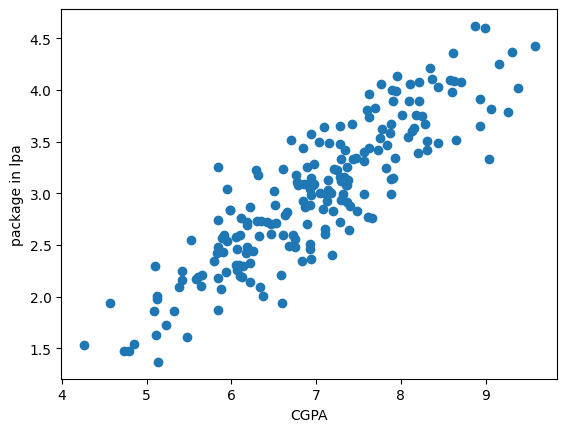

In [3]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("package in lpa")

In [4]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


Text(0, 0.5, 'package in lpa')

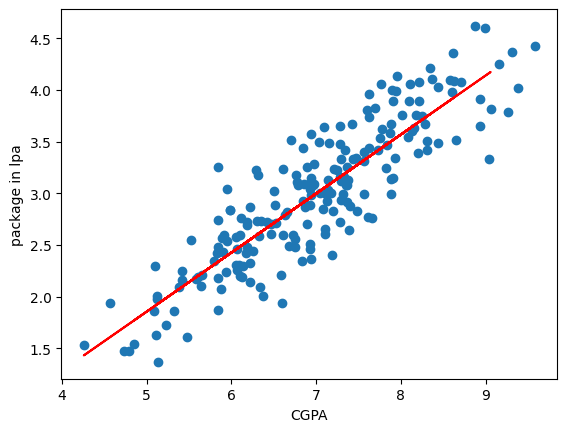

In [6]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_test,y_pred,color="red")
plt.xlabel("CGPA")
plt.ylabel("package in lpa")

In [7]:
slope=lr.coef_
intercept=lr.intercept_
slope,intercept

(array([0.57111357]), np.float64(-0.9998951779221357))

In [9]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("r2score:", r2)


MSE: 0.09122322472141596
MAE: 0.24266327437416046
r2score: 0.7774721122516276


In [11]:
# adjusted r2 score
adjusted_r2_score=1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-1)
print(adjusted_r2_score)

0.7728361145902032


In [19]:
# adding a random column and checking r2 score and adjusted r2 score
new_df=pd.DataFrame()
new_df=df.copy()
new_df["random"]=np.random.random(200)
new_df.head()

,cgpa,package,random
0,6.89,3.26,0.366739
1,5.12,1.98,0.366017
2,7.82,3.25,0.325657
3,7.42,3.67,0.833971
4,6.94,3.57,0.613363


In [21]:
from sklearn.model_selection import train_test_split

X=new_df[["cgpa","random"]]
y=new_df.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("r2score:", r2)

adjusted_r2_score=1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-1)
print(adjusted_r2_score)

r2score: 0.7768111563037923
0.772161388726788
